In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import wave
import IPython.display as ipd # load a local WAV file and PLAY!!!
import librosa
import librosa.display

In [2]:
set_a = pd.read_csv('inputsound/set_a.csv')
set_b = pd.read_csv('inputsound/set_b.csv')
set_a_timing = pd.read_csv('inputsound/set_a_timing.csv')
print(f"Shape a = {set_a.shape}")
print(f"Shape b = {set_b.shape}")
print(f"Shape a_timing = {set_a_timing.shape}")

Shape a = (176, 4)
Shape b = (656, 4)
Shape a_timing = (390, 4)


### Concat set_a and set-b

In [3]:
train_ab = pd.concat([set_a, set_b])

In [37]:
train_ab.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

## Labels

In [39]:
train_ab.groupby(['label','dataset']).count()

fname  sublabel
label      dataset                 
artifact   a           40         0
extrahls   a           19         0
extrastole b           46         0
murmur     a           34         0
           b           95        29
normal     a           31         0
           b          320       120

 # Moving to fre

# MFCC

In [96]:
normal_file
signal, rate = librosa.load(normal_file)
mfcc = librosa.feature.mfcc(y=signal, sr = rate)
print(mfcc.shape)

(20, 345)


In [97]:
S = librosa.feature.melspectrogram(y=signal, sr=rate, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

[[-316.10596    -310.8758     -306.57843    ... -310.63013
  -308.99725    -311.91953   ]
 [  60.030426     60.64634      60.63127    ...   61.7085
    56.116707     53.1548    ]
 [  19.345825     20.351774     22.711044   ...   23.609522
    16.522863     15.225949  ]
 ...
 [  -1.2032924     1.2920165     1.6789914  ...   -4.831105
    -5.611643     -0.45039755]
 [  -3.5643134     2.1731079     1.4246987  ...   -1.8750952
    -1.7290454    -1.3562404 ]
 [  -5.1146255    -2.7549963    -3.9392262  ...   -5.0252514
    -2.4316525     1.5535884 ]]


In [99]:
mfcc = librosa.feature.mfcc(y = signal, sr = rate, n_mfcc = 40)
print(mfcc.reshape([-1,1]).shape)


(13800, 1)


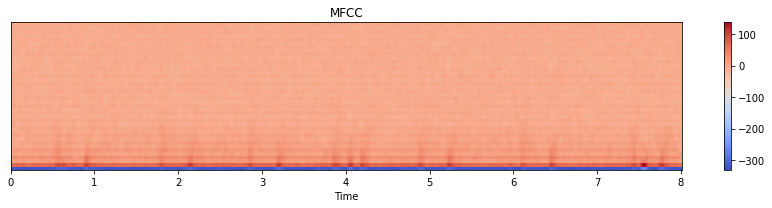

In [103]:
plt.figure(figsize=(12,3))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()

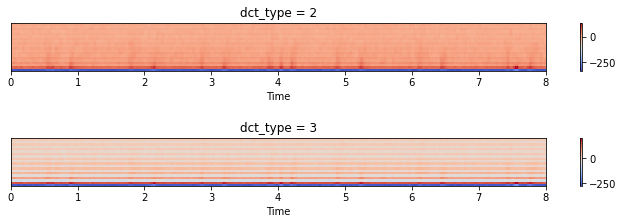

In [104]:
m_slaney = librosa.feature.mfcc(y=signal, sr=rate, dct_type=2)
plt.figure(figsize=(12,3))

m_htk = librosa.feature.mfcc(y=signal, sr=rate, dct_type=3)
plt.subplot(3,1,1)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title("dct_type = 2")
plt.colorbar()
plt.subplot(3,1,3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title("dct_type = 3")
plt.colorbar()